In [ ]:
# %load_ext cudf.pandas
import pandas as pd
import numpy as np
import sklearn
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import zscore, boxcox, yeojohnson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/india_weather_data_final_modified.csv')
df

,date,latitude,longitude,temperature,humidity,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall
0,2023-01-01 00:00:00,28.6139,77.2090,100.000000,21.767475,0.428064,56.787047,89.803147,1003.885666,29.282458,6.353398,0,0.827196,34.565602,385.710085,0.0
1,2023-01-01 00:00:00,19.0760,72.8777,33.993264,79.398241,13.603933,36.321945,75.198203,500.000000,30.385799,6.653509,0,8.040858,43.141373,944.176384,0.0
2,2023-01-01 00:00:00,12.9716,77.5946,33.961716,58.128192,100.000000,49.585297,60.621663,1001.774831,31.567394,5.976996,0,6.776773,0.212155,451.964858,0.0
3,2023-01-01 00:00:00,22.5726,88.3639,33.673459,61.555974,2.785259,21.462155,38.284893,993.455514,29.974869,7.757285,0,5.783869,0.389140,743.226528,0.0
4,2023-01-01 00:00:00,13.0827,80.2707,29.084337,80.626150,9.399230,58.245053,21.538080,1020.945313,25.815398,3.376130,0,8.133818,0.000000,493.243162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,2023-12-31 00:00:00,26.9124,75.7873,26.953116,10.750396,7.283812,42.931319,4.105989,1010.601581,23.460987,11.000000,0,5.547614,0.000000,314.796047,0.0
87366,2023-12-31 00:00:00,23.0225,72.5714,29.271160,45.747917,5.387717,62.750554,94.304727,1028.154754,28.091781,5.527791,0,1.686894,22.859290,309.870871,0.0
87367,2023-12-31 00:00:00,11.0168,76.9558,18.288829,65.408875,11.468064,46.203524,72.496943,1031.745053,14.584656,6.898736,0,8.501204,49.810313,469.576720,0.0
87368,2023-12-31 00:00:00,15.2993,74.1240,39.507514,87.323015,11.564559,63.297263,7.232933,983.218962,37.369088,8.704918,1,5.016441,0.000000,394.944374,0.0


In [ ]:
df.isnull().sum()

,0
date,0
latitude,0
longitude,0
temperature,6
humidity,6
wind_speed,0
cloud_cover,0
precipitation_probability,0
pressure_surface_level,0
dew_point,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
date,0
latitude,0
longitude,0
temperature,0
humidity,0
wind_speed,0
cloud_cover,0
precipitation_probability,0
pressure_surface_level,0
dew_point,0


In [ ]:
df.dtypes

,0
date,object
latitude,float64
longitude,float64
temperature,float64
humidity,float64
wind_speed,float64
cloud_cover,float64
precipitation_probability,float64
pressure_surface_level,float64
dew_point,float64


In [ ]:
df[['Date', 'Time']] = df['date'].str.split(' ', expand=True)
df = df.drop(columns=['date'])
df

<ipython-input-6-0119ce1a5542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Date', 'Time']] = df['date'].str.split(' ', expand=True)
<ipython-input-6-0119ce1a5542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Date', 'Time']] = df['date'].str.split(' ', expand=True)


,latitude,longitude,temperature,humidity,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall,Date,Time
0,28.6139,77.2090,100.000000,21.767475,0.428064,56.787047,89.803147,1003.885666,29.282458,6.353398,0,0.827196,34.565602,385.710085,0.0,2023-01-01,00:00:00
1,19.0760,72.8777,33.993264,79.398241,13.603933,36.321945,75.198203,500.000000,30.385799,6.653509,0,8.040858,43.141373,944.176384,0.0,2023-01-01,00:00:00
2,12.9716,77.5946,33.961716,58.128192,100.000000,49.585297,60.621663,1001.774831,31.567394,5.976996,0,6.776773,0.212155,451.964858,0.0,2023-01-01,00:00:00
3,22.5726,88.3639,33.673459,61.555974,2.785259,21.462155,38.284893,993.455514,29.974869,7.757285,0,5.783869,0.389140,743.226528,0.0,2023-01-01,00:00:00
4,13.0827,80.2707,29.084337,80.626150,9.399230,58.245053,21.538080,1020.945313,25.815398,3.376130,0,8.133818,0.000000,493.243162,0.0,2023-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,26.9124,75.7873,26.953116,10.750396,7.283812,42.931319,4.105989,1010.601581,23.460987,11.000000,0,5.547614,0.000000,314.796047,0.0,2023-12-31,00:00:00
87366,23.0225,72.5714,29.271160,45.747917,5.387717,62.750554,94.304727,1028.154754,28.091781,5.527791,0,1.686894,22.859290,309.870871,0.0,2023-12-31,00:00:00
87367,11.0168,76.9558,18.288829,65.408875,11.468064,46.203524,72.496943,1031.745053,14.584656,6.898736,0,8.501204,49.810313,469.576720,0.0,2023-12-31,00:00:00
87368,15.2993,74.1240,39.507514,87.323015,11.564559,63.297263,7.232933,983.218962,37.369088,8.704918,1,5.016441,0.000000,394.944374,0.0,2023-12-31,00:00:00


In [ ]:
df[['Hours', 'Minutes', 'Seconds']] = df['Time'].str.split(':', expand=True)
df = df.drop(columns=['Time'])
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
df = df.drop(columns=['Date'])
df

,latitude,longitude,temperature,humidity,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,...,visibility,rainfall,solar_radiation,snowfall,Hours,Minutes,Seconds,Year,Month,Day
0,28.6139,77.2090,100.000000,21.767475,0.428064,56.787047,89.803147,1003.885666,29.282458,6.353398,...,0.827196,34.565602,385.710085,0.0,00,00,00,2023,01,01
1,19.0760,72.8777,33.993264,79.398241,13.603933,36.321945,75.198203,500.000000,30.385799,6.653509,...,8.040858,43.141373,944.176384,0.0,00,00,00,2023,01,01
2,12.9716,77.5946,33.961716,58.128192,100.000000,49.585297,60.621663,1001.774831,31.567394,5.976996,...,6.776773,0.212155,451.964858,0.0,00,00,00,2023,01,01
3,22.5726,88.3639,33.673459,61.555974,2.785259,21.462155,38.284893,993.455514,29.974869,7.757285,...,5.783869,0.389140,743.226528,0.0,00,00,00,2023,01,01
4,13.0827,80.2707,29.084337,80.626150,9.399230,58.245053,21.538080,1020.945313,25.815398,3.376130,...,8.133818,0.000000,493.243162,0.0,00,00,00,2023,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,26.9124,75.7873,26.953116,10.750396,7.283812,42.931319,4.105989,1010.601581,23.460987,11.000000,...,5.547614,0.000000,314.796047,0.0,00,00,00,2023,12,31
87366,23.0225,72.5714,29.271160,45.747917,5.387717,62.750554,94.304727,1028.154754,28.091781,5.527791,...,1.686894,22.859290,309.870871,0.0,00,00,00,2023,12,31
87367,11.0168,76.9558,18.288829,65.408875,11.468064,46.203524,72.496943,1031.745053,14.584656,6.898736,...,8.501204,49.810313,469.576720,0.0,00,00,00,2023,12,31
87368,15.2993,74.1240,39.507514,87.323015,11.564559,63.297263,7.232933,983.218962,37.369088,8.704918,...,5.016441,0.000000,394.944374,0.0,00,00,00,2023,12,31


In [ ]:
df.columns

Index(['latitude', 'longitude', 'temperature', 'humidity', 'wind_speed',
       'cloud_cover', 'precipitation_probability', 'pressure_surface_level',
       'dew_point', 'uv_index', 'heatwave', 'visibility', 'rainfall',
       'solar_radiation', 'snowfall', 'Hours', 'Minutes', 'Seconds', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
df = df[['Year','Month', 'Day', 'Hours', 'Minutes', 'Seconds', 'latitude', 'longitude', 'temperature', 'humidity', 'wind_speed',
       'cloud_cover', 'precipitation_probability', 'pressure_surface_level',
       'dew_point', 'uv_index', 'heatwave', 'visibility', 'rainfall',
       'solar_radiation', 'snowfall']]
df

,Year,Month,Day,Hours,Minutes,Seconds,latitude,longitude,temperature,humidity,...,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall
0,2023,01,01,00,00,00,28.6139,77.2090,100.000000,21.767475,...,56.787047,89.803147,1003.885666,29.282458,6.353398,0,0.827196,34.565602,385.710085,0.0
1,2023,01,01,00,00,00,19.0760,72.8777,33.993264,79.398241,...,36.321945,75.198203,500.000000,30.385799,6.653509,0,8.040858,43.141373,944.176384,0.0
2,2023,01,01,00,00,00,12.9716,77.5946,33.961716,58.128192,...,49.585297,60.621663,1001.774831,31.567394,5.976996,0,6.776773,0.212155,451.964858,0.0
3,2023,01,01,00,00,00,22.5726,88.3639,33.673459,61.555974,...,21.462155,38.284893,993.455514,29.974869,7.757285,0,5.783869,0.389140,743.226528,0.0
4,2023,01,01,00,00,00,13.0827,80.2707,29.084337,80.626150,...,58.245053,21.538080,1020.945313,25.815398,3.376130,0,8.133818,0.000000,493.243162,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,2023,12,31,00,00,00,26.9124,75.7873,26.953116,10.750396,...,42.931319,4.105989,1010.601581,23.460987,11.000000,0,5.547614,0.000000,314.796047,0.0
87366,2023,12,31,00,00,00,23.0225,72.5714,29.271160,45.747917,...,62.750554,94.304727,1028.154754,28.091781,5.527791,0,1.686894,22.859290,309.870871,0.0
87367,2023,12,31,00,00,00,11.0168,76.9558,18.288829,65.408875,...,46.203524,72.496943,1031.745053,14.584656,6.898736,0,8.501204,49.810313,469.576720,0.0
87368,2023,12,31,00,00,00,15.2993,74.1240,39.507514,87.323015,...,63.297263,7.232933,983.218962,37.369088,8.704918,1,5.016441,0.000000,394.944374,0.0


In [ ]:
df.describe()

,latitude,longitude,temperature,humidity,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall
count,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000,87358.000000
mean,20.529110,77.061389,30.273826,55.978348,7.507096,50.048451,49.949022,1000.083742,27.772063,6.881685,0.085258,4.496630,9.222257,464.429019,0.003434
std,7.055357,4.372164,8.785855,24.364171,4.345532,28.855080,28.869458,28.969394,8.901179,2.750646,0.279267,3.263185,14.095224,268.877594,0.414364
min,11.016800,72.571400,0.009687,10.000631,0.000131,0.000052,0.000657,500.000000,-4.686124,0.000000,0.000000,0.500008,0.000000,50.012522,0.000000
25%,13.082700,74.124000,25.573944,35.827645,3.752597,25.055580,24.869059,975.119489,22.836306,4.966457,0.000000,1.333521,0.000000,238.035171,0.000000
50%,19.076000,76.955800,30.670760,57.228425,7.500668,50.158069,49.858433,1000.134028,28.138318,6.994855,0.000000,5.037553,2.529138,424.288321,0.000000
75%,26.912400,77.594600,35.913249,75.710295,11.267198,75.081333,74.937327,1025.129470,33.505581,9.042929,0.000000,7.520924,12.287576,686.020787,0.000000
max,32.726600,88.363900,100.000000,150.000000,100.000000,99.999461,99.998943,1049.998522,49.897714,11.000000,1.000000,50.000000,300.000000,999.964169,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87358 entries, 0 to 87369
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       87358 non-null  object 
 1   Month                      87358 non-null  object 
 2   Day                        87358 non-null  object 
 3   Hours                      87358 non-null  object 
 4   Minutes                    87358 non-null  object 
 5   Seconds                    87358 non-null  object 
 6   latitude                   87358 non-null  float64
 7   longitude                  87358 non-null  float64
 8   temperature                87358 non-null  float64
 9   humidity                   87358 non-null  float64
 10  wind_speed                 87358 non-null  float64
 11  cloud_cover                87358 non-null  float64
 12  precipitation_probability  87358 non-null  float64
 13  pressure_surface_level     87358 non-null  float64


In [ ]:
df['log_rainfall'] = np.log1p(df['rainfall'])
df

<ipython-input-12-e9b3c5d28858>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_rainfall'] = np.log1p(df['rainfall'])


,Year,Month,Day,Hours,Minutes,Seconds,latitude,longitude,temperature,humidity,...,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,rainfall,solar_radiation,snowfall,log_rainfall
0,2023,01,01,00,00,00,28.6139,77.2090,100.000000,21.767475,...,89.803147,1003.885666,29.282458,6.353398,0,0.827196,34.565602,385.710085,0.0,3.571379
1,2023,01,01,00,00,00,19.0760,72.8777,33.993264,79.398241,...,75.198203,500.000000,30.385799,6.653509,0,8.040858,43.141373,944.176384,0.0,3.787398
2,2023,01,01,00,00,00,12.9716,77.5946,33.961716,58.128192,...,60.621663,1001.774831,31.567394,5.976996,0,6.776773,0.212155,451.964858,0.0,0.192400
3,2023,01,01,00,00,00,22.5726,88.3639,33.673459,61.555974,...,38.284893,993.455514,29.974869,7.757285,0,5.783869,0.389140,743.226528,0.0,0.328685
4,2023,01,01,00,00,00,13.0827,80.2707,29.084337,80.626150,...,21.538080,1020.945313,25.815398,3.376130,0,8.133818,0.000000,493.243162,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,2023,12,31,00,00,00,26.9124,75.7873,26.953116,10.750396,...,4.105989,1010.601581,23.460987,11.000000,0,5.547614,0.000000,314.796047,0.0,0.000000
87366,2023,12,31,00,00,00,23.0225,72.5714,29.271160,45.747917,...,94.304727,1028.154754,28.091781,5.527791,0,1.686894,22.859290,309.870871,0.0,3.172174
87367,2023,12,31,00,00,00,11.0168,76.9558,18.288829,65.408875,...,72.496943,1031.745053,14.584656,6.898736,0,8.501204,49.810313,469.576720,0.0,3.928099
87368,2023,12,31,00,00,00,15.2993,74.1240,39.507514,87.323015,...,7.232933,983.218962,37.369088,8.704918,1,5.016441,0.000000,394.944374,0.0,0.000000


In [ ]:
df.dtypes

,0
Year,object
Month,object
Day,object
Hours,object
Minutes,object
Seconds,object
latitude,float64
longitude,float64
temperature,float64
humidity,float64


In [ ]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Hours'] = df['Hours'].astype(int)
df['Minutes'] = df['Minutes'].astype(int)
df['Seconds'] = df['Seconds'].astype(int)
df.dtypes

<ipython-input-14-79c3b291ca0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
<ipython-input-14-79c3b291ca0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype(int)
<ipython-input-14-79c3b291ca0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,0
Year,int64
Month,int64
Day,int64
Hours,int64
Minutes,int64
Seconds,int64
latitude,float64
longitude,float64
temperature,float64
humidity,float64


In [ ]:
scaler = MinMaxScaler()
X = df.drop(['rainfall', 'log_rainfall'], axis=1)
y = df['rainfall']
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Feature importance analysis
y = df['rainfall']

model = RandomForestRegressor(n_jobs = -1)
model.fit(X_scaled, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                      Feature    Importance
12  precipitation_probability  7.371758e-01
9                    humidity  2.532669e-02
10                 wind_speed  2.531476e-02
11                cloud_cover  2.477617e-02
13     pressure_surface_level  2.404648e-02
17                 visibility  2.256550e-02
18            solar_radiation  2.162743e-02
15                   uv_index  2.146191e-02
14                  dew_point  1.848525e-02
8                 temperature  1.792176e-02
3                       Hours  1.737825e-02
2                         Day  1.614228e-02
1                       Month  1.309096e-02
7                   longitude  7.290186e-03
6                    latitude  6.629036e-03
16                   heatwave  7.671372e-04
19                   snowfall  3.639846e-07
5                     Seconds  0.000000e+00
4                     Minutes  0.000000e+00
0                        Year  0.000000e+00


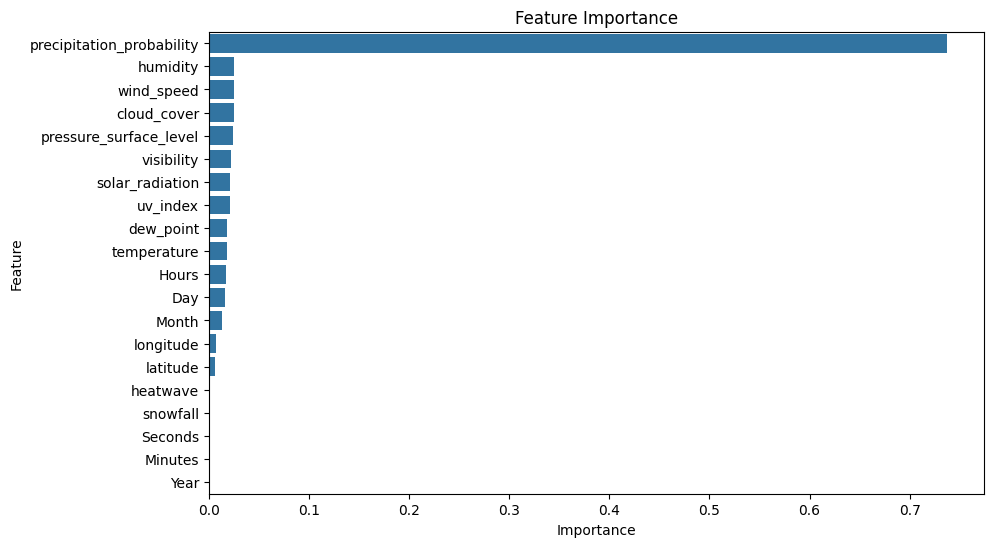

In [ ]:
# prompt: visualize the data

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

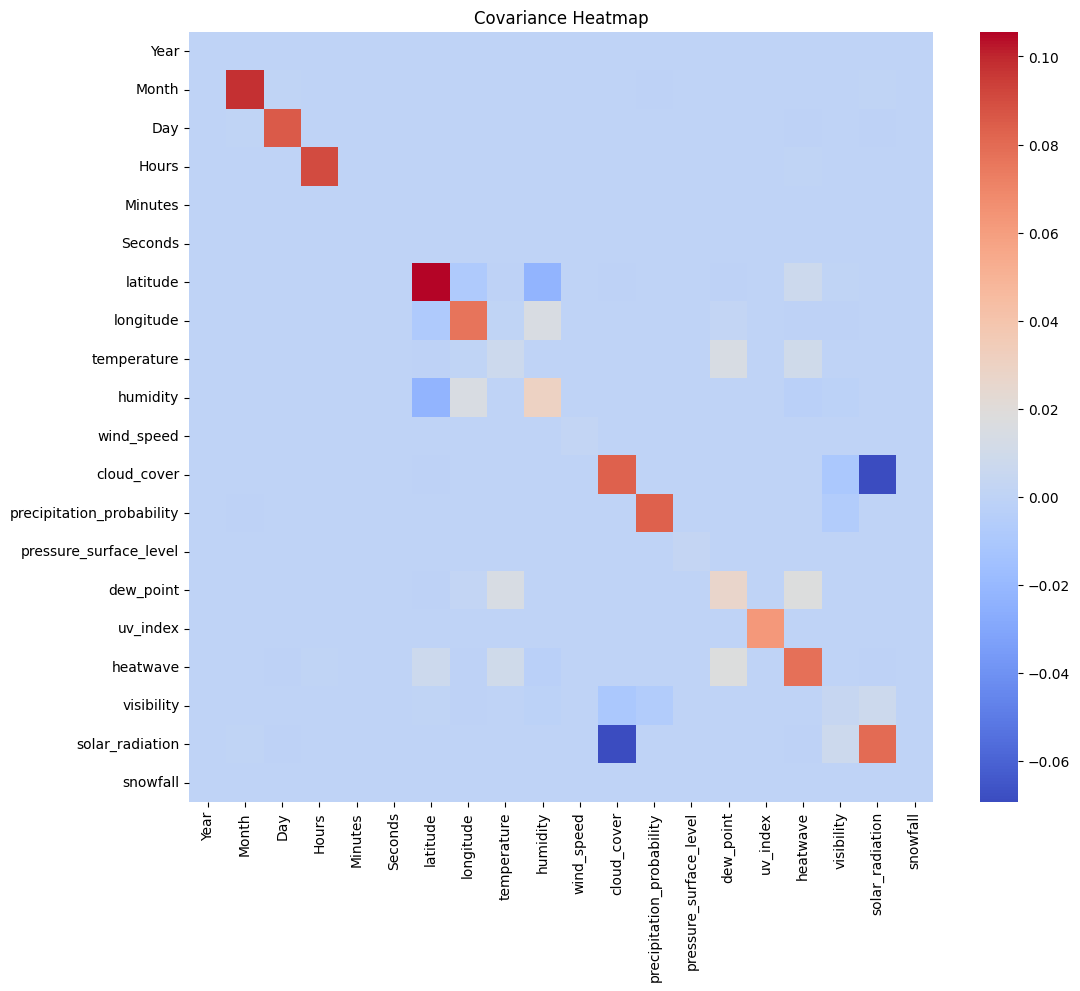

In [ ]:
# Calculate the covariance matrix
covariance_matrix = X_scaled_df.cov()

# Create a heatmap of the covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heatmap')
plt.show()

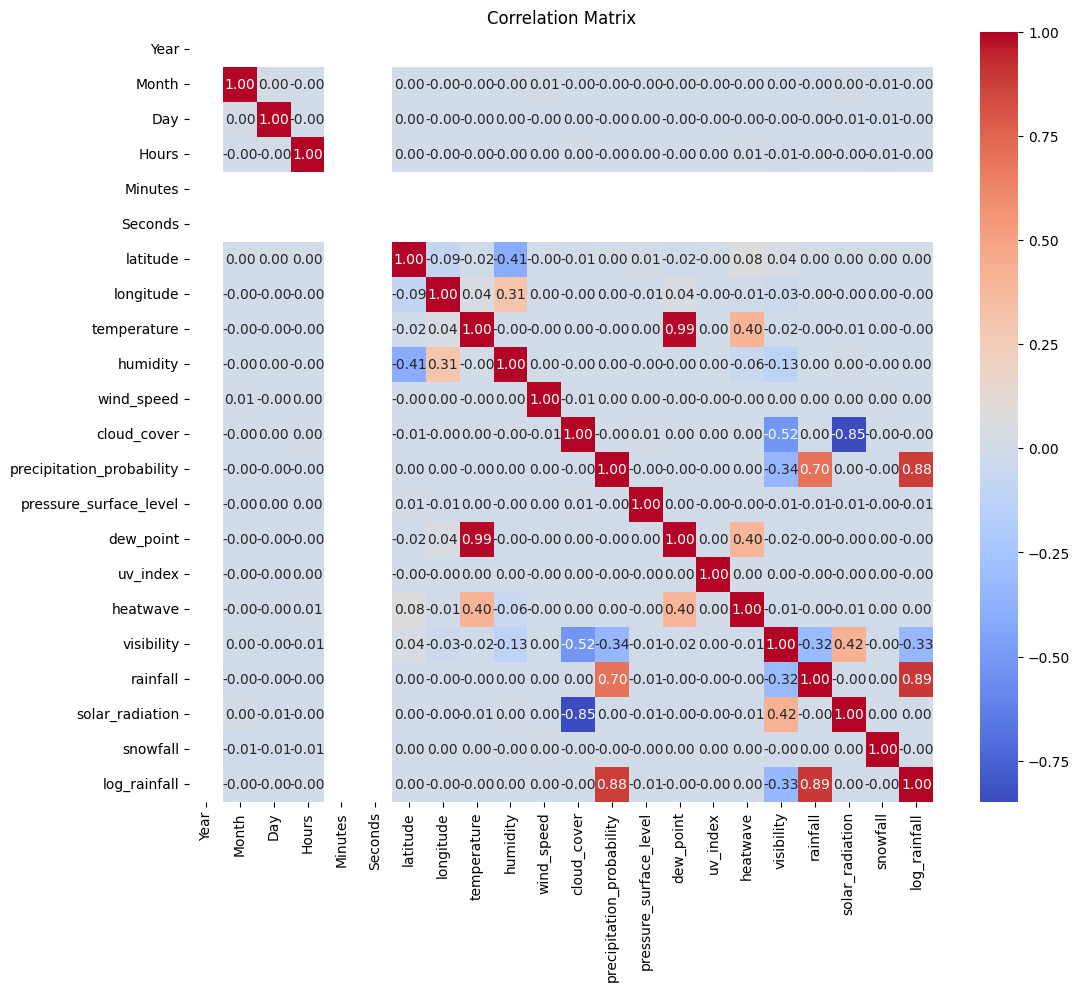

In [ ]:
# Convert numeric columns to appropriate data type before calculating correlation
numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns
correlation_matrix = df[numeric_cols].corr()  # Calculate correlation for numeric columns only

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

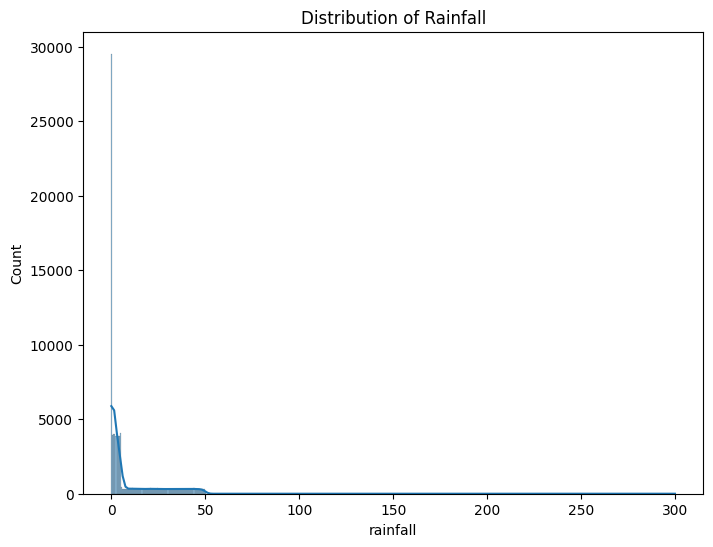

In [ ]:
# Distribution of rainfall
plt.figure(figsize=(8, 6))
sns.histplot(df['rainfall'], kde=True)
plt.title('Distribution of Rainfall')
plt.show()

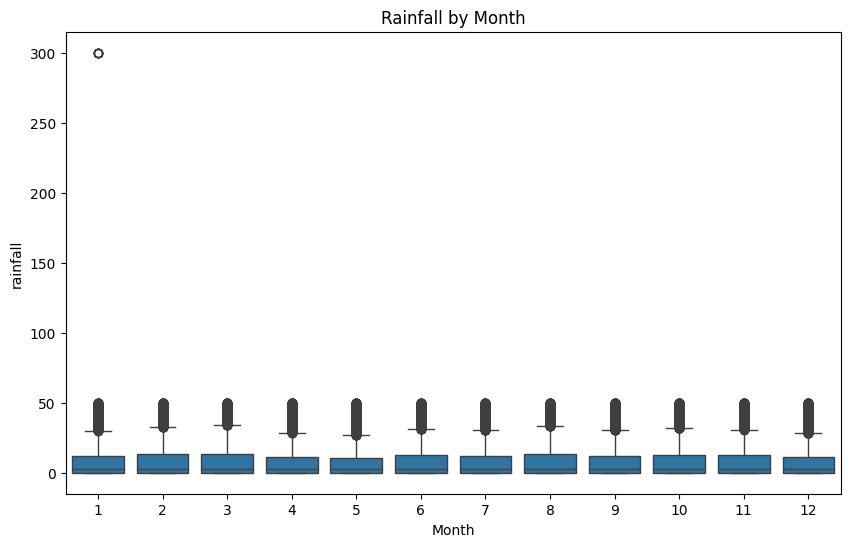

In [ ]:
# Boxplot of rainfall by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='rainfall', data=df)
plt.title('Rainfall by Month')
plt.show()

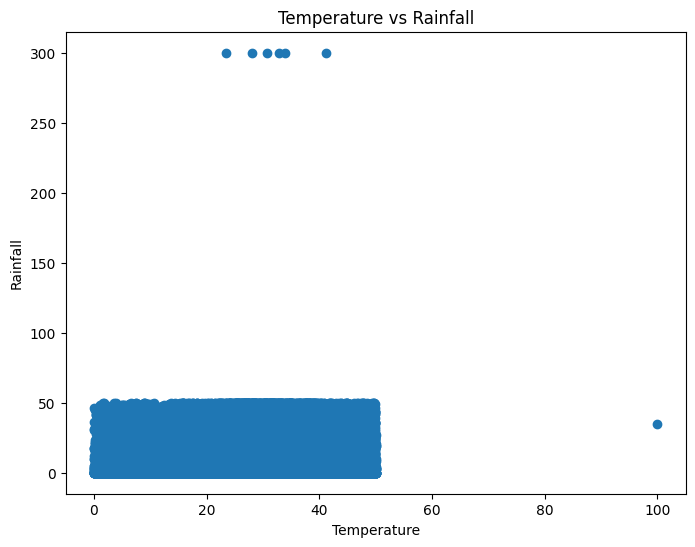

In [ ]:
# Scatter plot of temperature vs rainfall
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['rainfall'])
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Temperature vs Rainfall')
plt.show()

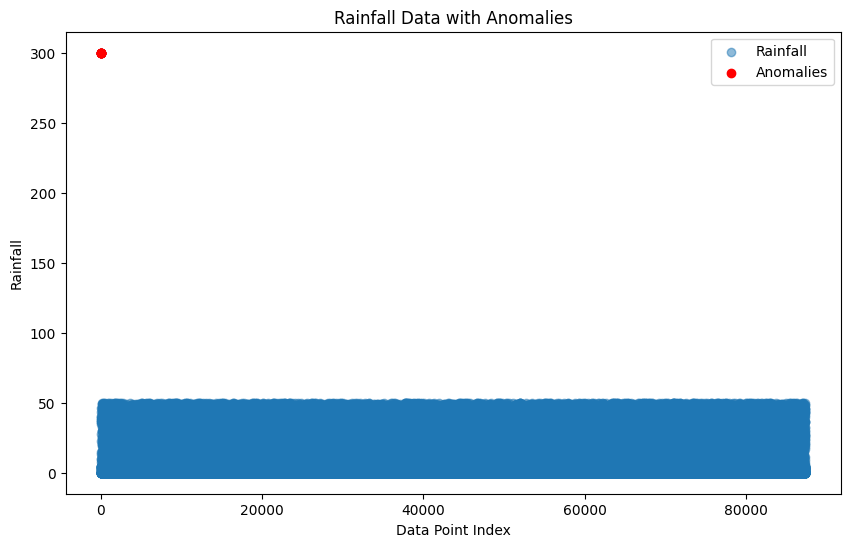

In [ ]:
# Identify anomalies using Z-score
def find_anomalies(data):
    z = np.abs(zscore(data))
    threshold = 3
    anomalies = data[(z > threshold)]
    return anomalies

# Find anomalies in rainfall
rainfall_anomalies = find_anomalies(df['rainfall'])

# Plot the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['rainfall'], label='Rainfall', alpha=0.5)
plt.scatter(rainfall_anomalies.index, rainfall_anomalies, color='red', label='Anomalies')
plt.xlabel('Data Point Index')
plt.ylabel('Rainfall')
plt.title('Rainfall Data with Anomalies')
plt.legend()
plt.show()

<ipython-input-22-c91454f0abdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


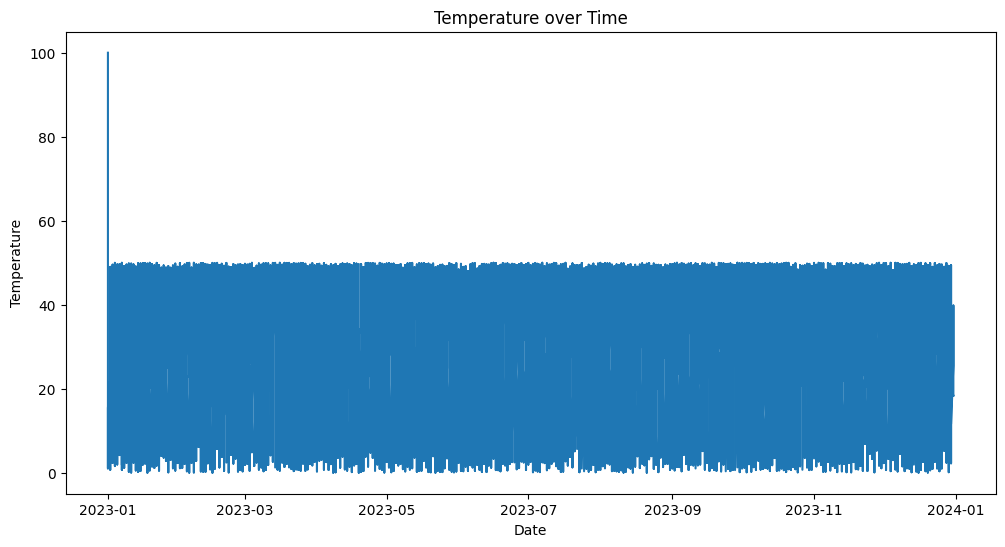

In [ ]:
# Line plot of temperature over time (using Year, Month, Day)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()

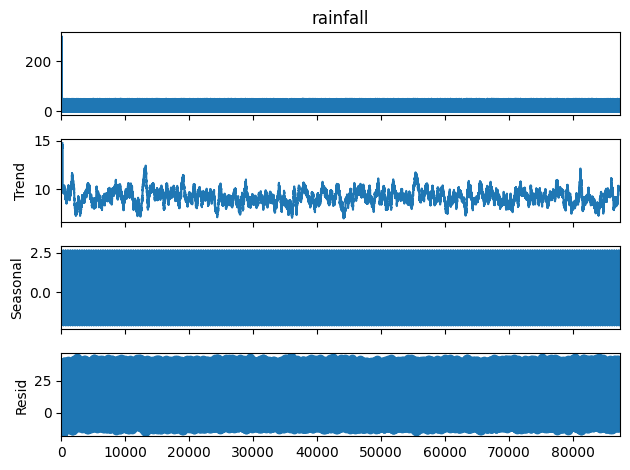

In [ ]:
# Time series decomposition of rainfall
result = seasonal_decompose(df['rainfall'], model='additive', period = 365)
result.plot()
plt.show()

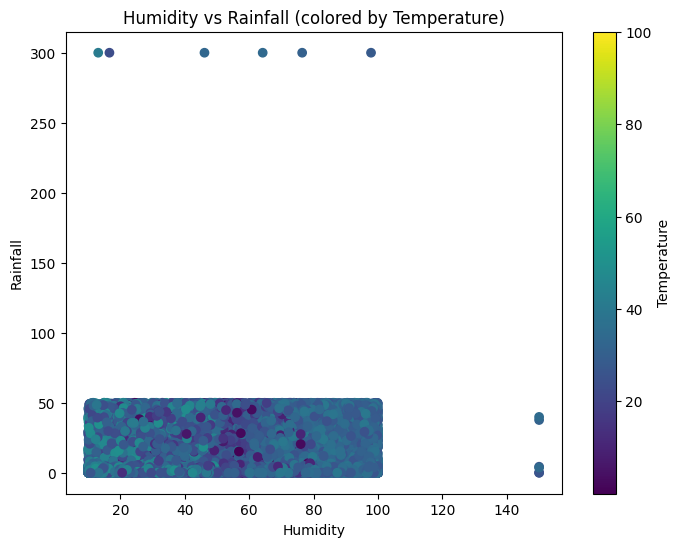

In [ ]:
# Scatter plot of humidity vs rainfall with color based on temperature
plt.figure(figsize=(8, 6))
plt.scatter(df['humidity'], df['rainfall'], c=df['temperature'], cmap='viridis')
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.title('Humidity vs Rainfall (colored by Temperature)')
plt.colorbar(label='Temperature')
plt.show()

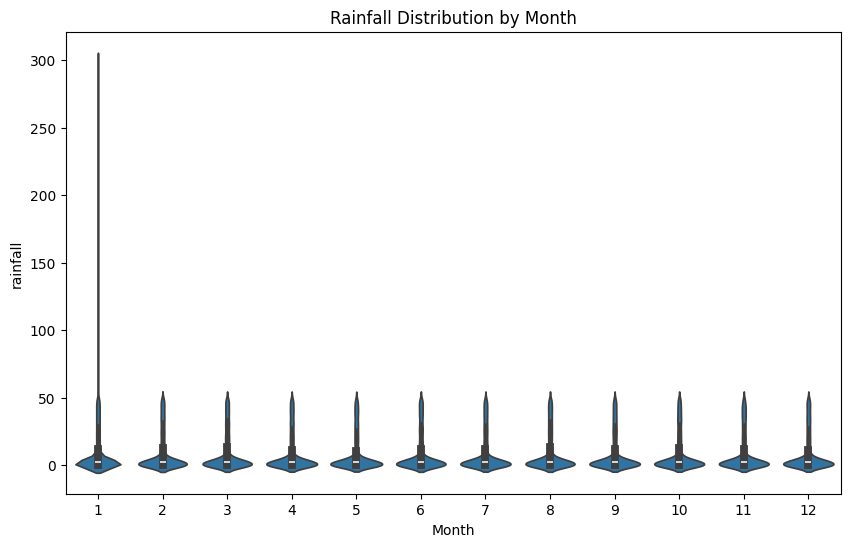

In [ ]:
# Violin plot of rainfall by month
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='rainfall', data=df)
plt.title('Rainfall Distribution by Month')
plt.show()

In [ ]:
Features = df.drop(['rainfall', 'log_rainfall', 'longitude', 'latitude', 'heatwave', 'snowfall', 'Year', 'Minutes', 'Seconds'], axis=1)
Features
Labels = df['rainfall']

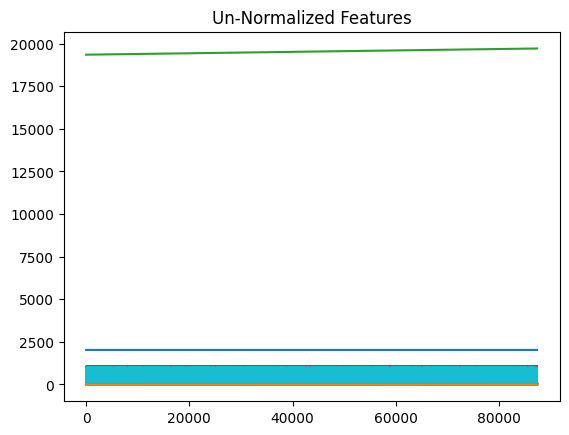

In [ ]:
plt.plot(df)
plt.title("Un-Normalized Features")
plt.show()

In [ ]:
Labels.dtypes

dtype('float64')

In [ ]:
Labels = Labels.astype(float)
Labels.dtype

dtype('float64')

In [ ]:
# prompt: create a matrix for covariance in the Features

covariance_matrix = X_scaled_df.cov()
covariance_matrix

,Year,Month,Day,Hours,Minutes,Seconds,latitude,longitude,temperature,humidity,wind_speed,cloud_cover,precipitation_probability,pressure_surface_level,dew_point,uv_index,heatwave,visibility,solar_radiation,snowfall
Year,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Month,0.0,0.097830,0.000393,-0.000061,0.0,0.0,7.617859e-06,-0.000008,-0.000052,-1.117161e-04,1.007966e-04,-0.000165,-3.010630e-04,-4.579047e-05,-0.000110,-0.000087,-0.000272,0.000006,0.000393,-3.441910e-05
Day,0.0,0.000393,0.085493,-0.000061,0.0,0.0,7.439795e-06,-0.000008,-0.000017,4.531249e-05,-3.407039e-05,0.000288,-7.765550e-05,4.004308e-05,-0.000044,-0.000284,-0.000306,-0.000087,-0.000423,-3.361457e-05
Hours,0.0,-0.000061,-0.000061,0.090581,0.0,0.0,6.899723e-06,-0.000008,-0.000065,-4.046114e-05,1.569462e-05,0.000312,-3.356787e-05,3.503419e-06,-0.000111,0.000022,0.000422,-0.000156,-0.000021,-1.642487e-05
Minutes,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Seconds,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
latitude,0.0,0.000008,0.000007,0.000007,0.0,0.0,1.056152e-01,-0.007993,-0.000497,-2.305410e-02,-3.833628e-05,-0.000493,1.560868e-04,9.620785e-05,-0.000903,-0.000026,0.007504,0.000786,0.000299,2.875825e-08
longitude,0.0,-0.000008,-0.000008,-0.000008,0.0,0.0,-7.993415e-03,0.076646,0.000997,1.508416e-02,3.748275e-05,-0.000062,4.192198e-05,-1.029517e-04,0.001862,-0.000095,-0.000484,-0.000604,-0.000010,7.056372e-06
temperature,0.0,-0.000052,-0.000017,-0.000065,0.0,0.0,-4.967920e-04,0.000997,0.007721,-4.789664e-05,-8.941346e-06,0.000056,-6.869302e-05,1.429490e-05,0.014134,0.000007,0.009916,-0.000094,-0.000131,1.036636e-06
humidity,0.0,-0.000112,0.000045,-0.000040,0.0,0.0,-2.305410e-02,0.015084,-0.000048,3.028664e-02,1.657122e-05,-0.000045,7.962258e-08,-2.436880e-05,-0.000124,0.000089,-0.002697,-0.001444,0.000222,-4.784366e-07


In [ ]:
for col in Features.columns:
    Features[col] = Features[col].astype(float)
Features

In [ ]:
Features = Features.drop(["Date"], axis = 1)

In [ ]:
Scaler = MinMaxScaler()
Features = Scaler.fit_transform(Features)
Features

array([[0.        , 0.        , 0.        , ..., 0.57758168, 0.00660986,
        0.35338384],
       [0.        , 0.        , 0.        , ..., 0.60486445, 0.15234042,
        0.94127303],
       [0.        , 0.        , 0.        , ..., 0.54336326, 0.12680335,
        0.42312926],
       ...,
       [1.        , 1.        , 0.        , ..., 0.62715778, 0.16164034,
        0.441669  ],
       [1.        , 1.        , 0.        , ..., 0.79135618, 0.09124108,
        0.36310464],
       [1.        , 1.        , 0.        , ..., 0.84108208, 0.01973319,
        0.15001334]])

In [ ]:
TrainFeatures, TestFeatures, TrainLabels, TestLabels = train_test_split(Features, Labels, test_size=0.2, random_state=42)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

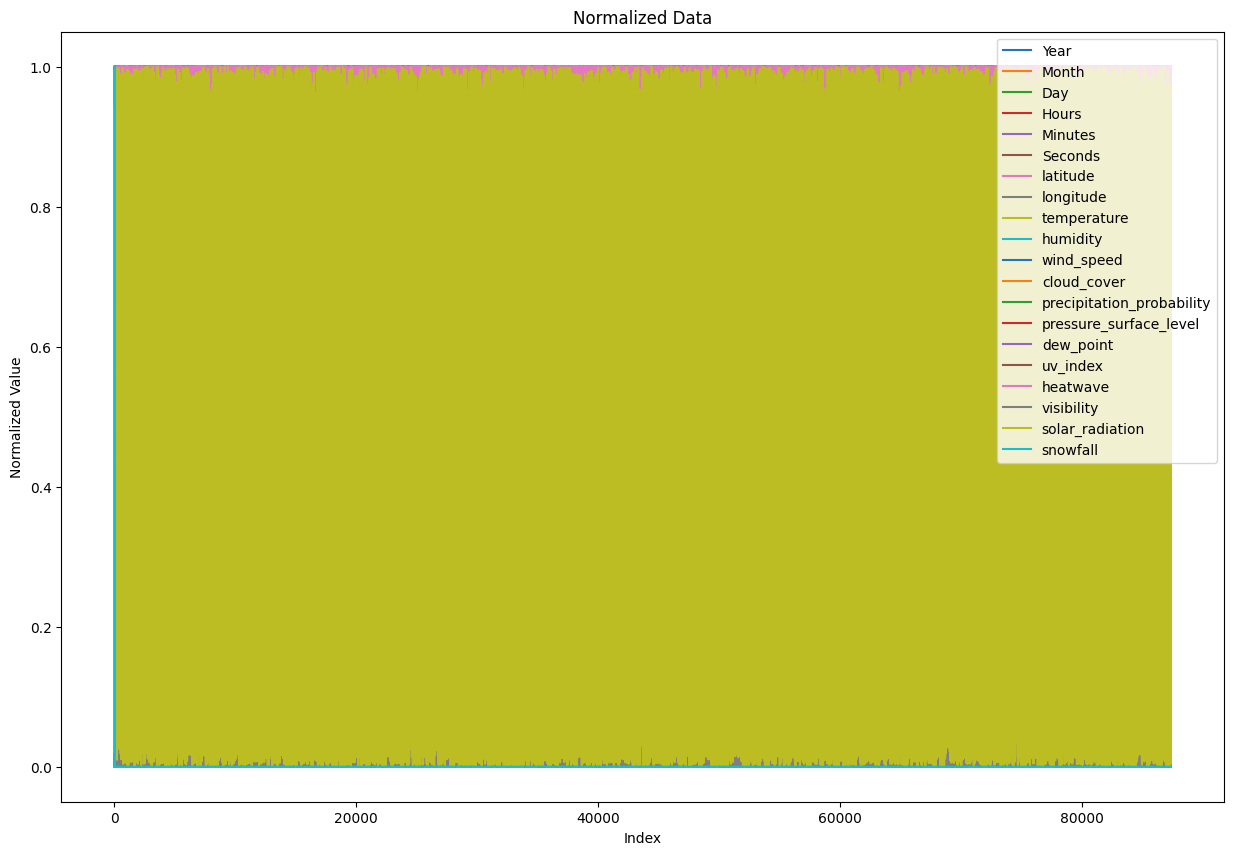

In [ ]:
plt.figure(figsize=(15, 10))
for col in X_scaled_df.columns:
    plt.plot(X_scaled_df[col], label=col)
plt.title("Normalized Data")
plt.xlabel("Index")
plt.ylabel("Normalized Value")
plt.legend(loc='upper right')
plt.show()

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(TrainFeatures, TrainLabels)
predictions = model.predict(TestFeatures)
mse = mean_squared_error(TestLabels, predictions)
r2 = r2_score(TestLabels, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)
model.fit(TrainFeatures, TrainLabels)
predictions = model.predict(TestFeatures)
mse = mean_squared_error(TestLabels, predictions)
r2 = r2_score(TestLabels, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)